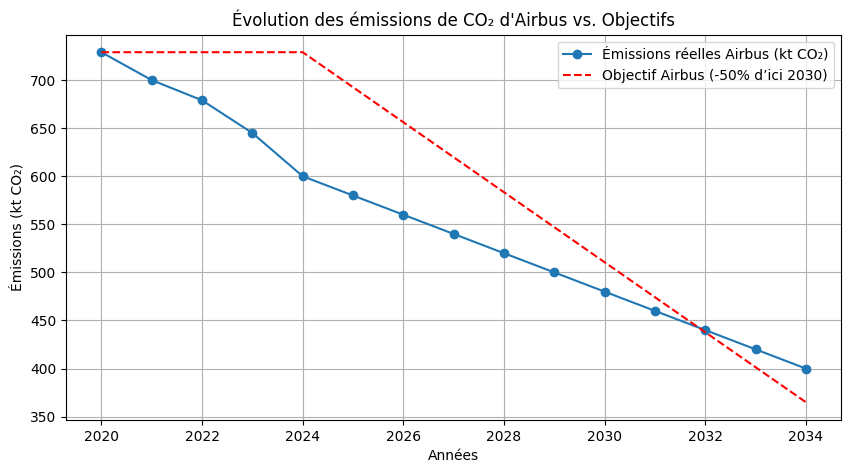

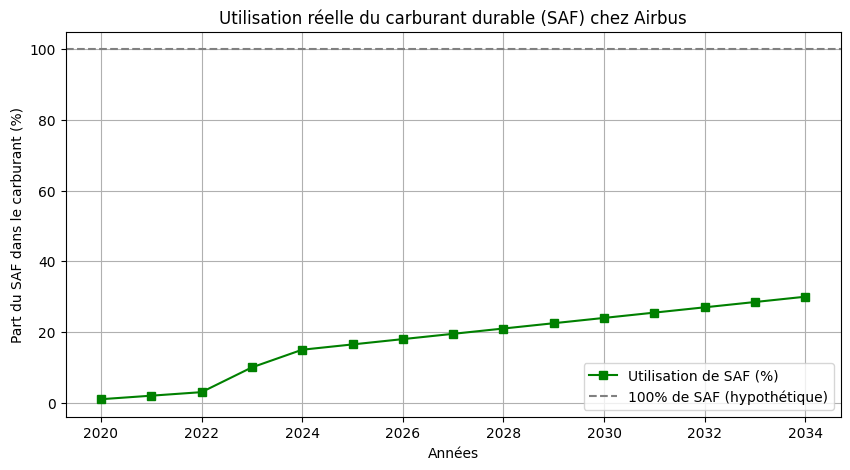

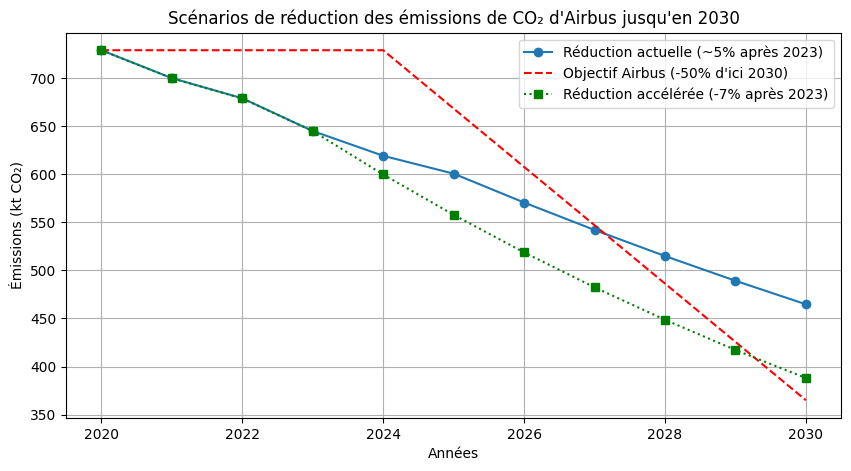

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# üìå Donn√©es fictives bas√©es sur le rapport et les tendances du march√©
temps = np.arange(2020, 2035)

# √âmissions actuelles et projet√©es (en kilotonnes de CO‚ÇÇ)
emissions_co2 = [729, 700, 679, 645] + list(np.linspace(600, 400, len(temps) - 4))  # R√©duction progressive

# Objectif Airbus (-50% d‚Äôici 2030 par rapport √† 2020)
objectif_airbus = [729] * 4 + list(np.linspace(729, 365, len(temps) - 4))

# Part de SAF dans le carburant utilis√©
saf_utilisation = [1, 2, 3, 10] + list(np.linspace(15, 30, len(temps) - 4))  # Airbus annonce 30% en 2030

# üìä Visualisation des √©missions
plt.figure(figsize=(10, 5))
plt.plot(temps, emissions_co2, label="√âmissions r√©elles Airbus (kt CO‚ÇÇ)", marker="o", linestyle="-")
plt.plot(temps, objectif_airbus, label="Objectif Airbus (-50% d‚Äôici 2030)", linestyle="--", color="red")
plt.xlabel("Ann√©es")
plt.ylabel("√âmissions (kt CO‚ÇÇ)")
plt.title("√âvolution des √©missions de CO‚ÇÇ d'Airbus vs. Objectifs")
plt.legend()
plt.grid(True)
plt.show()

# üìä Visualisation de l'utilisation de SAF
plt.figure(figsize=(10, 5))
plt.plot(temps, saf_utilisation, label="Utilisation de SAF (%)", marker="s", linestyle="-", color="green")
plt.axhline(y=100, color="gray", linestyle="--", label="100% de SAF (hypoth√©tique)")
plt.xlabel("Ann√©es")
plt.ylabel("Part du SAF dans le carburant (%)")
plt.title("Utilisation r√©elle du carburant durable (SAF) chez Airbus")
plt.legend()
plt.grid(True)
plt.show()

# üìå Mod√©lisation des sc√©narios de r√©duction des √©missions jusqu'en 2030

# D√©finition des ann√©es
annees = np.arange(2020, 2031)  # Assure qu'on a bien 11 valeurs

# Sc√©nario 1 : R√©duction actuelle (~5%/an apr√®s 2023)
reduction_rate_scenario1 = [0.04, 0.03, 0.05] + [0.05] * (len(annees) - 4)
emissions_scenario1 = [729, 700, 679, 645]

for rate in reduction_rate_scenario1:
    emissions_scenario1.append(emissions_scenario1[-1] * (1 - rate))

# Ajuster la taille de emissions_scenario1
emissions_scenario1 = emissions_scenario1[:len(annees)]

# Sc√©nario 2 : Objectif Airbus (-50% en 2030)
objectif_airbus = [729] * 4 + list(np.linspace(729, 365, len(annees) - 4))

# Sc√©nario 3 : R√©duction acc√©l√©r√©e (~7%/an apr√®s 2023)
reduction_rate_scenario3 = [0.04, 0.03, 0.05] + [0.07] * (len(annees) - 4)
emissions_scenario3 = [729]

for rate in reduction_rate_scenario3:
    emissions_scenario3.append(emissions_scenario3[-1] * (1 - rate))

# Ajuster la taille de emissions_scenario3
emissions_scenario3 = emissions_scenario3[:len(annees)]

# üìä Visualisation des sc√©narios
plt.figure(figsize=(10, 5))
plt.plot(annees, emissions_scenario1, label="R√©duction actuelle (~5% apr√®s 2023)", linestyle="-", marker="o")
plt.plot(annees, objectif_airbus, label="Objectif Airbus (-50% d'ici 2030)", linestyle="--", color="red")
plt.plot(annees, emissions_scenario3, label="R√©duction acc√©l√©r√©e (-7% apr√®s 2023)", linestyle=":", marker="s", color="green")

plt.xlabel("Ann√©es")
plt.ylabel("√âmissions (kt CO‚ÇÇ)")
plt.title("Sc√©narios de r√©duction des √©missions de CO‚ÇÇ d'Airbus jusqu'en 2030")
plt.legend()
plt.grid(True)
plt.show()


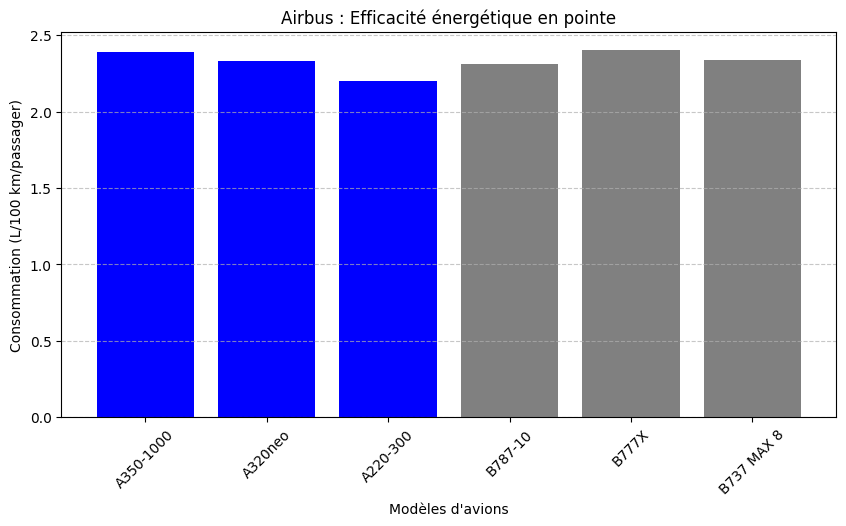

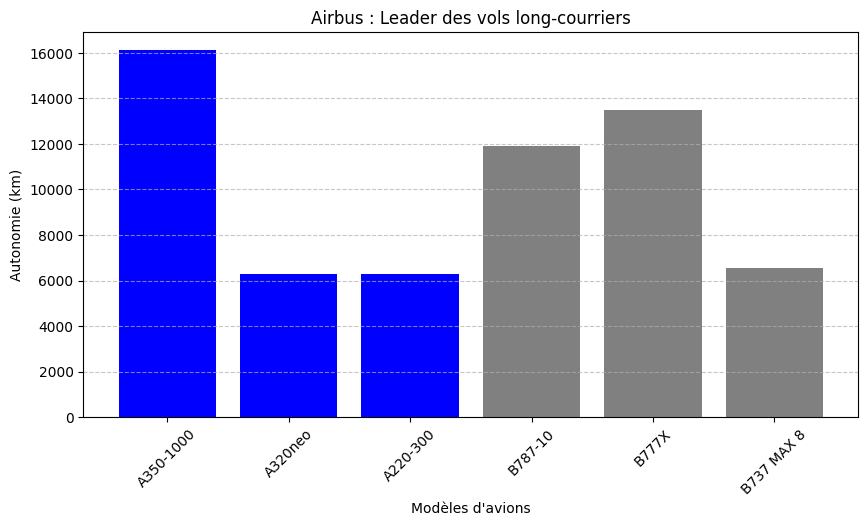

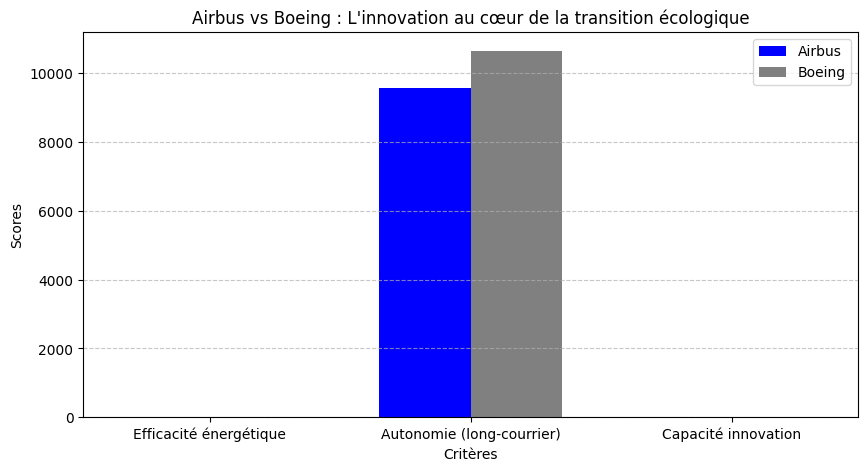

In [3]:
*

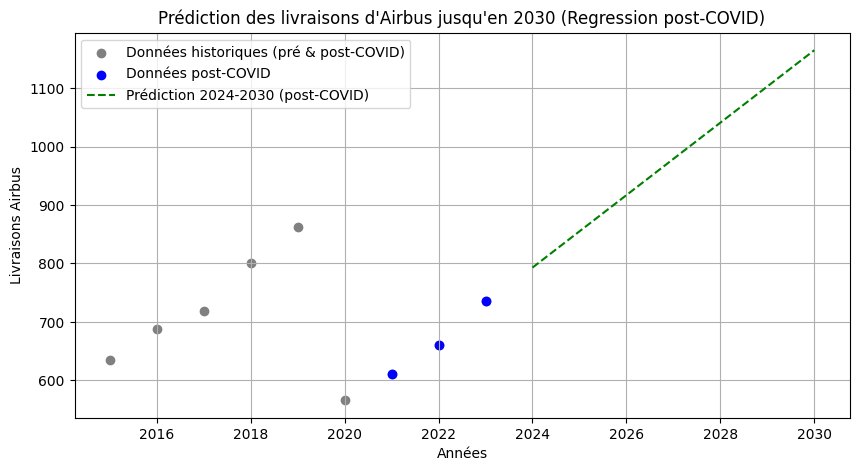

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# üìå Donn√©es historiques des livraisons Airbus
annees = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)
livraisons = np.array([635, 688, 718, 800, 863, 566, 611, 661, 735])

# üìå R√©gression lin√©aire en prenant uniquement les donn√©es apr√®s COVID (2021-2023)
annees_post_covid = np.array([2021, 2022, 2023]).reshape(-1, 1)
livraisons_post_covid = np.array([611, 661, 735])

# üìà Nouveau mod√®le de r√©gression lin√©aire bas√© sur les donn√©es post-COVID
modele_post_covid = LinearRegression()
modele_post_covid.fit(annees_post_covid, livraisons_post_covid)

# Pr√©diction des livraisons de 2024 √† 2030 avec cette tendance post-COVID
annees_futures = np.array([2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
predictions_post_covid = modele_post_covid.predict(annees_futures)

# üìå Visualisation am√©lior√©e : Affichage de toutes les donn√©es mais r√©gression apr√®s COVID
plt.figure(figsize=(10, 5))

# Affichage de toutes les donn√©es historiques
plt.scatter(annees, livraisons, color="gray", label="Donn√©es historiques (pr√© & post-COVID)")

# Affichage des donn√©es post-COVID en bleu
plt.scatter(annees_post_covid, livraisons_post_covid, color="blue", label="Donn√©es post-COVID")

# Affichage de la pr√©diction bas√©e uniquement sur la reprise post-COVID
plt.plot(annees_futures, predictions_post_covid, color="green", linestyle="--", label="Pr√©diction 2024-2030 (post-COVID)")

# Labels et titre
plt.xlabel("Ann√©es")
plt.ylabel("Livraisons Airbus")
plt.title("Pr√©diction des livraisons d'Airbus jusqu'en 2030 (Regression post-COVID)")
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()
